In [9]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import joblib
from joblib import Parallel, delayed
# SciKit library
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
# Custom functions
sys.path.append("../Scripts/")
from model import VAE
from soaper import soapFromUniverse
from utility import *
import MDAnalysis as mda
import tqdm.auto as tqdm

In [6]:
#Universe 
uni_iceih = mda.Universe("../../Data/Simulated_Phases/IceIh/pbc_mol.gro", "../../Data/Simulated_Phases/IceIh/pbc_mol.xtc")
uni_iceic = mda.Universe("../../Data/Simulated_Phases/IceIc/pbc_mol.gro", "../../Data/Simulated_Phases/IceIc/pbc_mol.xtc")
uni_ice2D = mda.Universe("../../Data/Simulated_Phases/Ice2D/pbc_mol.gro", "../../Data/Simulated_Phases/Ice2D/pbc_mol.xtc")
uni_ice3 = mda.Universe("../../Data/Simulated_Phases/Ice3/pbc_mol.gro", "../../Data/Simulated_Phases/Ice3/pbc_mol.xtc")
uni_ice5 = mda.Universe("../../Data/Simulated_Phases/Ice5/pbc_mol.gro", "../../Data/Simulated_Phases/Ice5/pbc_mol.xtc")
uni_ice6 = mda.Universe("../../Data/Simulated_Phases/Ice6/pbc_mol.gro", "../../Data/Simulated_Phases/Ice6/pbc_mol.xtc")
uni_ice7 = mda.Universe("../../Data/Simulated_Phases/Ice7/pbc_mol.gro", "../../Data/Simulated_Phases/Ice7/pbc_mol.xtc")
uni_ice12 = mda.Universe("../../Data/Simulated_Phases/Ice12/pbc_mol.gro", "../../Data/Simulated_Phases/Ice12/pbc_mol.xtc")
uni_ice17 = mda.Universe("../../Data/Simulated_Phases/Ice17/pbc_mol.gro", "../../Data/Simulated_Phases/Ice17/pbc_mol.xtc")
# Liquids
liq_1bar_230k = mda.Universe("../../Data/Simulated_Phases/Liquid/1bar_230k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/1bar_230k/pbc_mol.xtc")
liq_3000bar_230k = mda.Universe("../../Data/Simulated_Phases/Liquid/3000bar_230k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/3000bar_230k/pbc_mol.xtc")
liq_6000bar_230k = mda.Universe("../../Data/Simulated_Phases/Liquid/6000bar_230k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/6000bar_230k/pbc_mol.xtc")
liq_8000bar_230k = mda.Universe("../../Data/Simulated_Phases/Liquid/8000bar_230k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/8000bar_230k/pbc_mol.xtc")
liq_10000bar_250k = mda.Universe("../../Data/Simulated_Phases/Liquid/10000bar_250k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/10000bar_250k/pbc_mol.xtc")
liq_5000bar_250k = mda.Universe("../../Data/Simulated_Phases/Liquid/5000bar_250k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/5000bar_250k/pbc_mol.xtc")
liq_1bar_250k = mda.Universe("../../Data/Simulated_Phases/Liquid/1bar_250k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/1bar_250k/pbc_mol.xtc")
liq_1bar_300k = mda.Universe("../../Data/Simulated_Phases/Liquid/1bar_300k/pbc_mol.gro", "../../Data/Simulated_Phases/Liquid/1bar_300k/pbc_mol.xtc")
#Minimized 
uni_iceih_min = mda.Universe("../../Data/Simulated_Phases/Minimized/iceih.gro")
uni_iceic_min = mda.Universe("../../Data/Simulated_Phases/Minimized/iceic.gro")
uni_ice2D_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice2d.gro")
uni_ice3_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice3.gro")
uni_ice5_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice5.gro")
uni_ice6_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice6.gro")
uni_ice7_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice7.gro")
uni_ice11_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice11.gro")
uni_ice12_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice12.gro")
uni_ice17_min = mda.Universe("../../Data/Simulated_Phases/Minimized/ice17.gro")

In [7]:
soaper = soapFromUniverse()

In [13]:
soap_ih_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_iceih, i) for i in tqdm.trange(0, 1000, 50))
soap_ic_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_iceic, i) for i in tqdm.trange(0, 1000, 50))
soap_2D_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_ice2D, i) for i in tqdm.trange(0, 1000, 50))
soap_3_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_ice3, i) for i in tqdm.trange(0, 1000, 50))
soap_5_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_ice5, i) for i in tqdm.trange(0, 1000, 50))
soap_6_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_ice6, i) for i in tqdm.trange(0, 1000, 50))
soap_7_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_ice7, i) for i in tqdm.trange(0, 1000, 50))
soap_12_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_ice12, i) for i in tqdm.trange(0, 1000, 50))
soap_17_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(uni_ice17, i) for i in tqdm.trange(0, 1000, 50))


  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
soap_liq_1bar_300k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_1bar_300k, i) for i in tqdm.trange(0, 1000, 100))
soap_liq_1bar_250k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_1bar_250k, i) for i in tqdm.trange(0, 1000, 100))
soap_liq_1bar_230k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_1bar_230k, i) for i in tqdm.trange(0, 100, 10))
soap_liq_3000bar_230k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_3000bar_230k, i) for i in tqdm.trange(0, 100, 10))
soap_liq_5000bar_250k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_5000bar_250k, i) for i in tqdm.trange(0, 1000, 100))
soap_liq_6000bar_230k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_6000bar_230k, i) for i in tqdm.trange(0, 1000, 100))
soap_liq_8000bar_230k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_8000bar_230k, i) for i in tqdm.trange(0, 1000, 100))
soap_liq_10000bar_250k_list = Parallel(n_jobs=10)(delayed(soaper.soaper)(liq_10000bar_250k, i) for i in tqdm.trange(0, 1000, 100))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [15]:
soap_iceih_min = soaper.soaper(uni_iceih_min)
soap_iceic_min = soaper.soaper(uni_iceic_min)
soap_ice2D_min = soaper.soaper(uni_ice2D_min)
soap_ice3_min = soaper.soaper(uni_ice3_min)
soap_ice5_min = soaper.soaper(uni_ice5_min)
soap_ice6_min = soaper.soaper(uni_ice6_min)
soap_ice7_min = soaper.soaper(uni_ice7_min)
soap_ice11_min = soaper.soaper(uni_ice11_min)
soap_ice12_min = soaper.soaper(uni_ice12_min)
soap_ice17_min = soaper.soaper(uni_ice17_min)

In [16]:
# static soaps
soap_ih = np.load("../../Data/Numpy_Processed/soap_ih.npy")
soap_ic = np.load("../../Data/Numpy_Processed/soap_ic.npy")
soap_2 = np.load("../../Data/Numpy_Processed/soap_2.npy")
soap_3 = np.load("../../Data/Numpy_Processed/soap_3.npy")
soap_4 = np.load("../../Data/Numpy_Processed/soap_4.npy")
soap_5 = np.load("../../Data/Numpy_Processed/soap_5.npy")
soap_6 = np.load("../../Data/Numpy_Processed/soap_6.npy")
soap_7 = np.load("../../Data/Numpy_Processed/soap_7.npy")
soap_8 = np.load("../../Data/Numpy_Processed/soap_8.npy")
soap_9 = np.load("../../Data/Numpy_Processed/soap_9.npy")
soap_11 = np.load("../../Data/Numpy_Processed/soap_11.npy")
soap_12 = np.load("../../Data/Numpy_Processed/soap_12.npy")
soap_13 = np.load("../../Data/Numpy_Processed/soap_13.npy")
soap_17 = np.load("../../Data/Numpy_Processed/soap_17.npy")
soap_liq = np.load("../../Data/Numpy_Processed/soap_liq.npy")

In [17]:
# Extracting SOAP data..
static_ice = np.concatenate([soap_4[::2], soap_7[::2],
                             soap_8, soap_9[::2], soap_11[::2], soap_12[::2], soap_13[::2], soap_17[::2]])
ice_soaps = np.concatenate([np.concatenate(soap_ih_list), np.concatenate(soap_ic_list), np.concatenate(soap_2D_list[7:]),
                np.concatenate(soap_3_list),np.concatenate(soap_5_list), np.concatenate(soap_6_list), np.concatenate(soap_7_list[10:]),
                np.concatenate(soap_12_list[:10]), np.concatenate(soap_17_list[:9])])
liquid_soaps = np.concatenate([np.concatenate(soap_liq_1bar_230k_list), np.concatenate(soap_liq_1bar_250k_list),np.concatenate(soap_liq_1bar_300k_list), 
                np.concatenate(soap_liq_3000bar_230k_list),np.concatenate(soap_liq_5000bar_250k_list),np.concatenate(soap_liq_6000bar_230k_list),
                np.concatenate(soap_liq_8000bar_230k_list),np.concatenate(soap_liq_10000bar_250k_list)])

all_soaps = np.concatenate([static_ice, ice_soaps, liquid_soaps], dtype = np.float32)

In [19]:
# Preprocessiong
scalerS = StandardScaler()
scalerS.fit(all_soaps)
scalerdatafit = scalerS.fit_transform(all_soaps)
X_trainS, X_testS, y_trainS, y_testS = train_test_split(scalerdatafit, scalerdatafit, test_size=0.25, random_state=1)
# Save the scaler
#joblib.dump(scalerS, "Saved/scaler.save")

In [20]:
# Model initialization and training..
pyvenc = VAE(952,X_trainS, X_testS, hidden1 = 1500, hidden2 = 600,hidden3=400,hidden4=100, 
                 code = 2, learning_rate=0.00001,batch_size=128, epochs=100,
                 shuffle=True, thresh = 1)
# This trains the model..
pyvenc.fit()
# Save the model
#torch.save(pyvenc.state_dict(), "Saved/pyvenc.pt")
## Using pretrained weights..
#pyvenc.load_state_dict(torch.load("Saved/pyvenc.pt"))
pyvenc.to('cpu')

Epoch: 1/100 | Train Loss: 78914.66868 | Val Loss: 68549.75207 | 
Epoch: 2/100 | Train Loss: 66278.57109 | Val Loss: 64606.28586 | 
Epoch: 3/100 | Train Loss: 63799.56464 | Val Loss: 63099.70361 | 
Epoch: 4/100 | Train Loss: 62668.72889 | Val Loss: 62271.37168 | 
Epoch: 5/100 | Train Loss: 61949.75753 | Val Loss: 61629.26848 | 
Epoch: 6/100 | Train Loss: 61381.78637 | Val Loss: 61112.76317 | 
Epoch: 7/100 | Train Loss: 60908.94012 | Val Loss: 60752.41517 | 
Epoch: 8/100 | Train Loss: 60514.18102 | Val Loss: 60355.14406 | 
Epoch: 9/100 | Train Loss: 60181.86361 | Val Loss: 60018.27098 | 
Epoch: 10/100 | Train Loss: 59899.22103 | Val Loss: 59781.66210 | 
Epoch: 11/100 | Train Loss: 59650.27189 | Val Loss: 59530.70361 | 
Epoch: 12/100 | Train Loss: 59422.66298 | Val Loss: 59343.39482 | 
Epoch: 13/100 | Train Loss: 59219.87997 | Val Loss: 59135.74293 | 
Epoch: 14/100 | Train Loss: 59032.29889 | Val Loss: 58970.89748 | 
Epoch: 15/100 | Train Loss: 58858.28446 | Val Loss: 58810.51049 | 
Epoc

VAE(
  (encoder): Sequential(
    (0): Linear(in_features=952, out_features=1500, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=1500, out_features=600, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=600, out_features=400, bias=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=400, out_features=100, bias=True)
    (7): GELU(approximate='none')
  )
  (mu): Linear(in_features=100, out_features=2, bias=True)
  (logvar): Linear(in_features=100, out_features=2, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=100, out_features=400, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=400, out_features=600, bias=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=600, out_features=1500, bias=True)
    (7): GELU(approximate='none')
    (8): Linear(in_features=1500, out_features=952

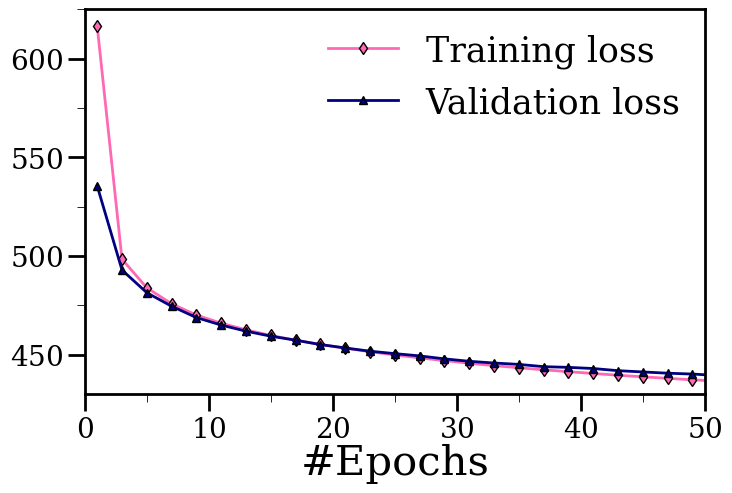

In [48]:
plt.style.use("style.txt")
fig, ax = plt.subplots(figsize = [8, 5])
ax.plot(np.arange(1, len(pyvenc.loss_train) + 1)[::2],pyvenc.loss_train[::2],"d-", c = "hotpink", lw = 2, label = "Training loss")
ax.plot(np.arange(1, len(pyvenc.loss_val) + 1)[::2], pyvenc.loss_val[::2],"^-", c = "navy", lw = 2, label = "Validation loss")

Ticker(ax)
ax.set_xlim([0, 50])
ax.set_ylim([430, 625])
ax.legend(fontsize = 25)
ax.set_xlabel("#Epochs", fontsize = 30)
plt.savefig("train_val_loss.svg")